In [1]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv("PATH_CUSUM"))

import numpy as np
from source.generator.change_point_generator import ChangePointGenerator
from source.detector.cusum import KS_CUM_Detector

# Abrupt Shift

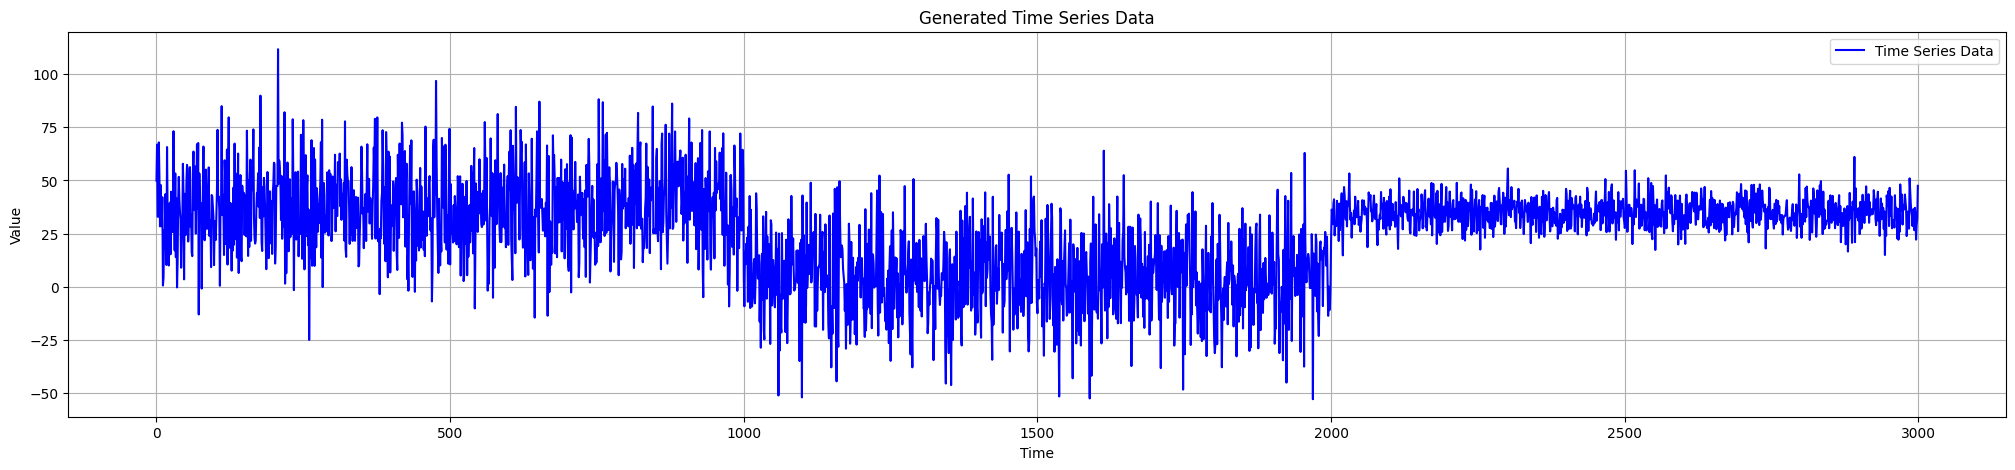

In [2]:
# Generate time series data with change points
generator = ChangePointGenerator(num_segments=3, 
                                segment_length=1000, 
                                change_point_type='sudden_shift',
                                seed=42
                                )
generator.generate_data()

# Plot the generated data
generator.plot_data()

# KS-Test

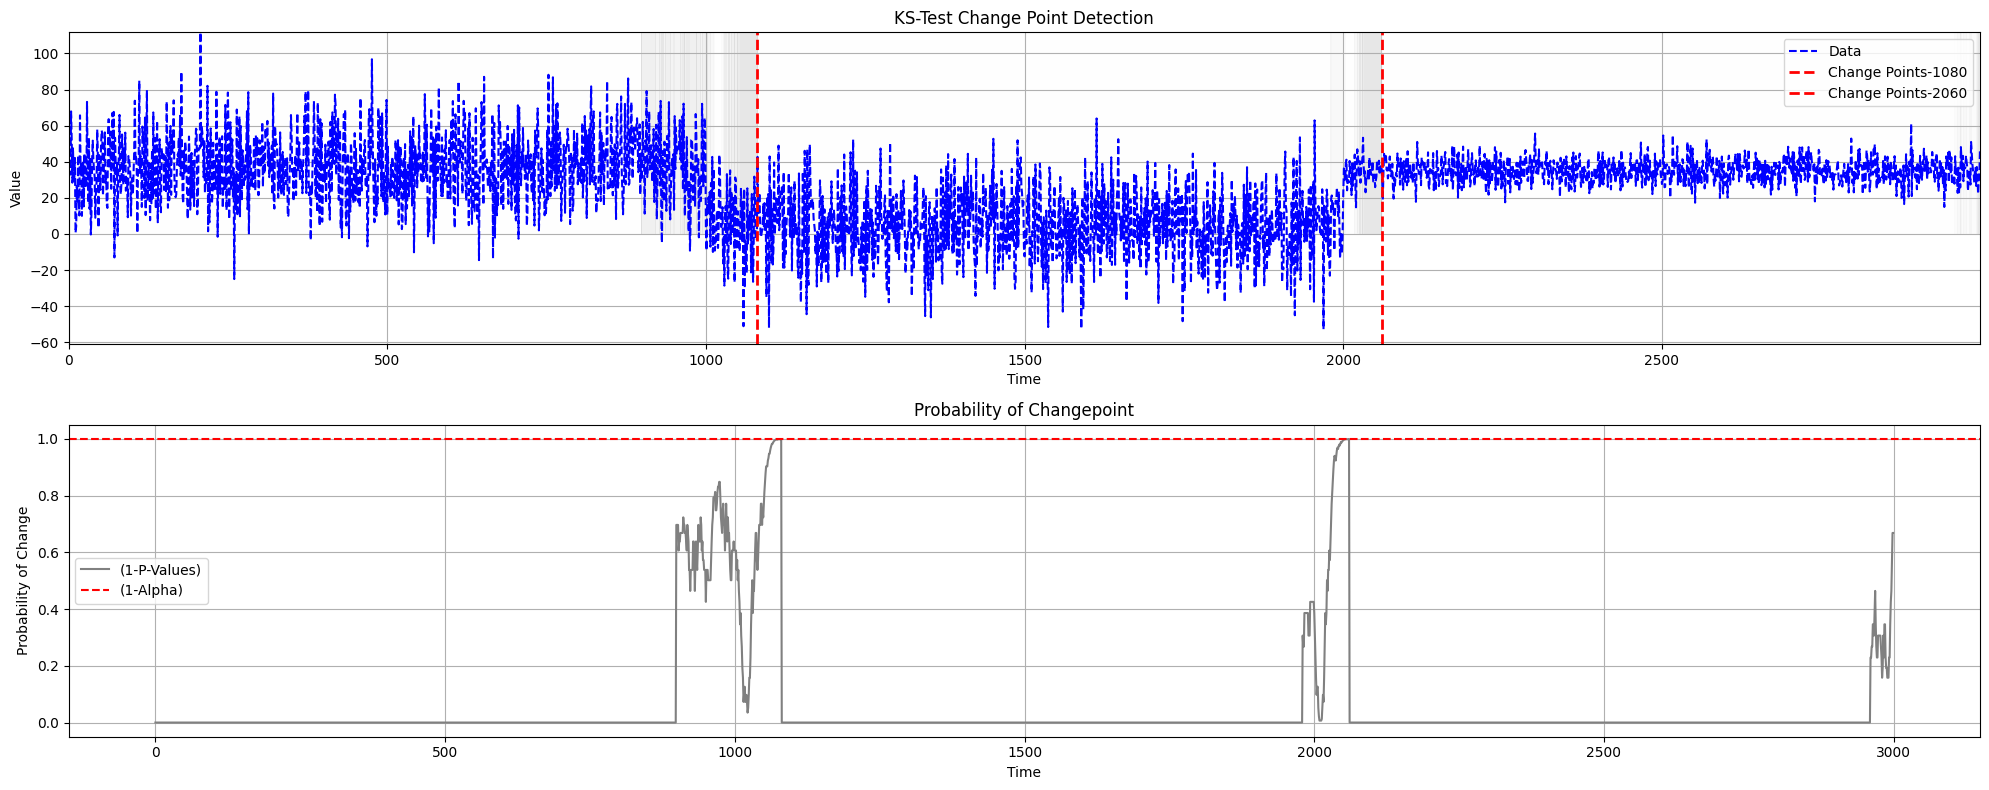

In [3]:
ks_detector = KS_CUM_Detector(window_pre=600, window_post=300, alpha=0.001)
results = ks_detector.offline_detection(generator.data)
ks_detector.plot_change_points(generator.data, results['change_points'], results['p_values'])

In [4]:
for data in generator.data:
    ks_statistic, p_value, is_change = ks_detector.detection(data)
    print(f"Change Detected: {is_change}\n -KS Statistic: {ks_statistic}, \n -P-Value: {p_value}")

Change Detected: False
 -KS Statistic: 0.06333333333333334, 
 -P-Value: 0.39367334051887554
Change Detected: False
 -KS Statistic: 0.06333333333333334, 
 -P-Value: 0.39367334051887554
Change Detected: False
 -KS Statistic: 0.06666666666666667, 
 -P-Value: 0.33181322041592926
Change Detected: False
 -KS Statistic: 0.07, 
 -P-Value: 0.27685076828423394
Change Detected: False
 -KS Statistic: 0.06666666666666667, 
 -P-Value: 0.33181322041592926
Change Detected: False
 -KS Statistic: 0.06666666666666667, 
 -P-Value: 0.33181322041592926
Change Detected: False
 -KS Statistic: 0.06666666666666667, 
 -P-Value: 0.33181322041592926
Change Detected: False
 -KS Statistic: 0.06833333333333333, 
 -P-Value: 0.30346380347522317
Change Detected: False
 -KS Statistic: 0.07166666666666667, 
 -P-Value: 0.2519599392200103
Change Detected: False
 -KS Statistic: 0.07166666666666667, 
 -P-Value: 0.2519599392200103
Change Detected: False
 -KS Statistic: 0.07166666666666667, 
 -P-Value: 0.2519599392200103
Change